# Introduction

**Resources**

* [Oxford VGG Flowers Datasets](http://www.robots.ox.ac.uk/~vgg/data/flowers/)

# Imports & Helpers

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io                   # read .mat files
import PIL                        # resize images

In [2]:
def download(url, dest, md5sum):
    import os
    import urllib
    import hashlib

    folder, file = os.path.split(dest)
    if folder != '':
        os.makedirs(folder, exist_ok=True)
    if not os.path.isfile(dest):
        print('Downloading', file, '...')
        urllib.request.urlretrieve(url, dest)
    else:
        print('Already Exists:', file)
    assert hashlib.md5(open(dest, 'rb').read()).hexdigest() == md5sum

In [3]:
def extract(src, dest):
    import os
    import tarfile
    
    path, file = os.path.split(src)
    extract_path, _ = os.path.splitext(src)
    already_extracted = os.path.isdir(dest)
    if not already_extracted:
        with tarfile.open(src, 'r') as zf:
            print('Extracting', file, '...')
            zf.extractall(dest)
    else:
        print('Already Extracted:', file)       
    assert os.path.isdir(extract_path)

# Oxford VGG Flowers - 17 Category

Where to download and unpack dataset? Folder will be created if doesn't exist.

In [4]:
dataset_location = './vgg-flowers-17/'

**Download and Extract**

In [5]:
download(url='http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz',
         dest=os.path.join(dataset_location, '17flowers.tgz'),
         md5sum='b59a65d8d1a99cd66944d474e1289eab')

Already Exists: 17flowers.tgz


In [6]:
extract(src=os.path.join(dataset_location, '17flowers.tgz'),
        dest=os.path.join(dataset_location, '17flowers'))

Already Extracted: 17flowers.tgz


**Load Dataset**

Load file names

In [7]:
all_files = np.loadtxt(os.path.join(dataset_location, '17flowers/jpg/files.txt'), dtype=str)
print('all_files.shape:', all_files.shape)
print('all_files:      ', all_files[:3])

all_files.shape: (1360,)
all_files:       ['image_0001.jpg' 'image_0002.jpg' 'image_0003.jpg']


Create labels

In [8]:
all_labels = []
for i in range(17):
    all_labels.extend([i]*80)
all_labels = np.array(all_labels)
print('all_labels.shape:', all_labels.shape)
print('all_labels.min():', all_labels.min())
print('all_labels.max():', all_labels.max())
print('all_labels:      ', all_labels)

all_labels.shape: (1360,)
all_labels.min(): 0
all_labels.max(): 16
all_labels:       [ 0  0  0 ... 16 16 16]


In [9]:
def load_images(folder, files, target_size):
    images_list = []
    for file in files:
        img_full_path = os.path.join(folder, file)
        img = PIL.Image.open(img_full_path)
        img = img.resize(target_size)
        images_list.append(np.array(img))
    return np.array(images_list)

In [10]:
all_images = load_images(folder=os.path.join(dataset_location, '17flowers/jpg'),
                         files=all_files, target_size=(224,224))

Show some images

In [11]:
def show_images(start_index, images_array, labels_array):
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=[16,9])
    for i, ax in enumerate(axes):
        ax.imshow(images_array[start_index+i])
        ax.set_title('Idx: '+str(start_index+i)+' Label: '+str(labels_array[start_index+i]))

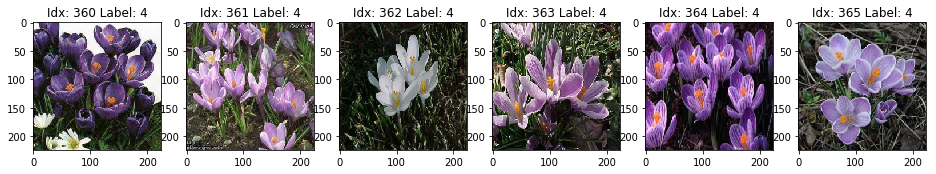

In [12]:
show_images(360, all_images, all_labels)

**Test / Validation Split**

In [13]:
train_indices = []
valid_indices = []
for i in range(0, 1360, 80):
    train_indices.extend(range(i, i+70))
    valid_indices.extend(range(i+70, i+80))
train_indices = np.array(train_indices)
valid_indices = np.array(valid_indices)
# Sanity check
all_indices = sorted(np.concatenate([train_indices, valid_indices]))
assert np.alltrue(np.array(range(1360)) == all_indices)

In [14]:
train_labels = all_labels[train_indices]
train_images = all_images[train_indices]
valid_labels = all_labels[valid_indices]
valid_images = all_images[valid_indices]

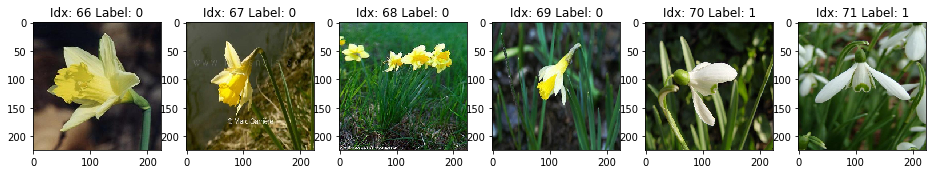

In [15]:
show_images(66, train_images, train_labels)

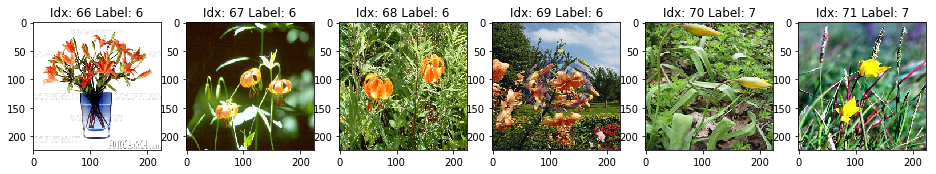

In [16]:
show_images(66, valid_images, valid_labels)

**Save to .npz**

In [17]:
save_path = os.path.join(dataset_location, '17flowers.npz')
save_path

'./vgg-flowers-17/17flowers.npz'

In [18]:
np.savez(save_path,
         train_images=train_images,
         train_labels=train_labels,
         valid_images=valid_images,
         valid_labels=valid_labels)

# Oxford VGG Flowers - 102 Category

In [ ]:
raise

Where to download and unpack dataset? Folder will be created if doesn't exist.

In [ ]:
dataset_location = './vgg-flowers-102/'

**Download and Extract**

In [ ]:
download(url='http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz',
         dest=os.path.join(dataset_location, '102flowers.tgz'),
         md5sum='52808999861908f626f3c1f4e79d11fa')
download(url='http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat',
         dest=os.path.join(dataset_location, 'imagelabels.mat'),
         md5sum='e0620be6f572b9609742df49c70aed4d')
download(url='http://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat',
         dest=os.path.join(dataset_location, 'setid.mat'),
         md5sum='a5357ecc9cb78c4bef273ce3793fc85c')

In [ ]:
extract(src=os.path.join(dataset_location, '102flowers.tgz'),
        dest=os.path.join(dataset_location, '102flowers'))

**Split Train/Valid/Test**

In [ ]:
all_files = np.array(sorted(os.listdir(os.path.join(dataset_location, '102flowers/jpg'))))
print('all_files.shape:', all_files.shape)
print('all_files:      ', all_files[:3])

In [ ]:
imagelabels_mat = scipy.io.loadmat(os.path.join(dataset_location, 'imagelabels.mat'))
all_labels = imagelabels_mat['labels'][0]-1
print('all_labels.shape:', all_labels.shape)
print('all_labels.min():', all_labels.min())
print('all_labels.max():', all_labels.max())
print('all_labels:      ', all_labels)

In [ ]:
setid_mat = scipy.io.loadmat(os.path.join(dataset_location, 'setid.mat'))
train_ids = setid_mat['trnid'][0]-1
valid_ids = setid_mat['valid'][0]-1
test_ids = setid_mat['tstid'][0]-1

In [ ]:
print('train_ids.shape:', train_ids.shape)
print('train_ids:      ', train_ids)
print('valid_ids.shape:', valid_ids.shape)
print('valid_ids:      ', valid_ids)
print('test_ids.shape: ', test_ids.shape)
print('test_ids:       ', test_ids)

In [ ]:
all_ids = np.array(sorted(np.concatenate([train_ids, valid_ids, test_ids])))
arr_range = np.array(range(0, 8189))
assert np.alltrue(all_ids == arr_range)

In [ ]:
train_labels = all_labels[train_ids]
valid_labels = all_labels[valid_ids]
test_labels = all_labels[test_ids]

In [ ]:
print(train_labels.min(), train_labels.max())
print(valid_labels.min(), valid_labels.max())
print(test_labels.min(), test_labels.max())

In [ ]:
from collections import Counter

In [ ]:
Counter(test_labels)

In [ ]:
fig, ax = plt.subplots(figsize=[16,9])
ax.bar(train_labels, bins=len(train_labels))